# Tuning the Elo Model
In following module we are going to find the optimal values for the K Factor and the Home Field Advantage for the ELO model we implemented

In [1]:
from schedule import Schedule
from sim import EloSimulator
from stats import Analyzer, Metrics
import numpy as np
%matplotlib ipympl
from matplotlib import pyplot as plt


## K factor analysis
We are first going to look for a range of optimal K_factors


In [ ]:
data_stop_date = "2024/03/01"
k_factor = [.01, .1, .5, 1, 5, 10, 20, 50, 100]
all_games_path = "/home/projects/baseball-MCS/data/intermediate/all_games.json"
b_scores = []
for k in k_factor:
    metrics = Metrics()
    simulator = EloSimulator(k_factor=k, home_advantage=0)
    schedule = Schedule(all_games_path, data_stop_date, simulator, metrics=metrics)
    n = 1
    schedule.prep()
    score = metrics.get_brier()
    # Accumulate the Brier Score and find the optimal one
    b_scores.append((score[0], k))

    print(f"K Factor: {k}")
    print(f"Brier Score: {score}")
    metrics.reset()

# Find the optimal K Factor
b_scores.sort()
print(f"Optimal K Factor: {b_scores[0][1]}")


Great it looks like the optimal K_factor is between 1 and 10. Now let's look for the optimal home_field advantange

## Home Field Advantage

In [11]:
data_stop_date = "2024/03/01"
home_advantage = [-200, -100, -50, -25, -10, 0, 10, 25, 50, 100, 200]
all_games_path = "/home/projects/baseball-MCS/data/intermediate/all_games.json"
b_scores = []
for home in home_advantage:
    metrics = Metrics()
    simulator = EloSimulator(k_factor=5, home_advantage=home)
    schedule = Schedule(all_games_path, data_stop_date, simulator, metrics=metrics)
    n = 1
    schedule.prep()
    score = metrics.get_brier()
    # Accumulate the Brier Score and find the optimal one
    b_scores.append((score[0], home))

    print(f"Home advantage factor: {home}")
    print(f"Brier Score: {score}")
    metrics.reset()

# Find the optimal K Factor
b_scores.sort()
print(f"Optimal Home Advantage Factor: {b_scores[0][1]}")

Home advantage factor: -200
Brier Score: (0.3256449309356687, None)
Home advantage factor: -100
Brier Score: (0.27287381973916114, None)
Home advantage factor: -50
Brier Score: (0.25463208066509657, None)
Home advantage factor: -25
Brier Score: (0.2486830693038158, None)
Home advantage factor: -10
Brier Score: (0.2462493344362084, None)
Home advantage factor: 0
Brier Score: (0.2451154743918888, None)
Home advantage factor: 10
Brier Score: (0.2443764839687894, None)
Home advantage factor: 25
Brier Score: (0.24400831885714022, None)
Home advantage factor: 50
Brier Score: (0.24533480553535253, None)
Home advantage factor: 100
Brier Score: (0.2546832732516525, None)
Home advantage factor: 200
Brier Score: (0.2921101460713724, None)
Optimal Home Advantage Factor: 25


Looks like the Optimal Home Advantage Factor is between 10 and 50. Since the optimal home advantage and optimal K factor may depend on each other, Let's now do a joint search of these optimal factors given that we have narrowed down the search space.

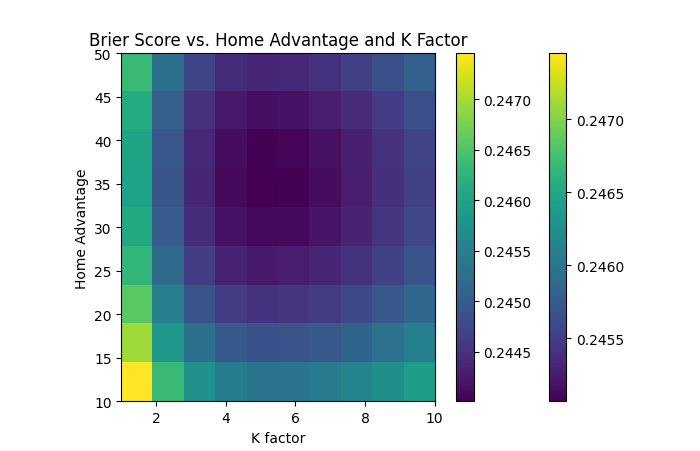

Optimal K Factor: 5
Optimal Home Advantage: 25
[[0.24634785 0.24527355 0.24472399 0.2444619  0.24437648 0.24440427
  0.24450712 0.24466148 0.24485232 0.2450698 ]
 [0.24613159 0.24505641 0.24450552 0.24424201 0.24415527 0.2441819
  0.24428373 0.24443718 0.2446272  0.24484393]
 [0.24601779 0.24494038 0.24438712 0.24412138 0.24403268 0.2440576
  0.24415795 0.24431007 0.24449889 0.24471452]
 [0.24600607 0.24492506 0.24436841 0.24409964 0.24400832 0.24403099
  0.24412938 0.24427977 0.24446701 0.24468118]
 [0.24609587 0.2450099  0.24444883 0.24417622 0.24408164 0.24410152
  0.24419748 0.24434571 0.244531   0.24474337]
 [0.24628646 0.24519418 0.24462767 0.24435041 0.24425191 0.24426845
  0.24436152 0.24450718 0.24469014 0.24490035]
 [0.24657696 0.24547701 0.24490403 0.24462133 0.24451825 0.24453091
  0.24462061 0.24476329 0.24494353 0.24515123]
 [0.24696632 0.24585736 0.24527688 0.24498792 0.24487961 0.24488784
  0.24497371 0.24511297 0.24529013 0.24549496]
 [0.24745335 0.24633404 0.24574503 

In [9]:
data_stop_date = "2024/03/01"
home_advantage = [10, 15, 20, 25, 30, 35, 40, 45, 50]
k_factor = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# home_advantage = [10, 50]
# k_factor = [1, 10]
all_games_path = "/home/projects/baseball-MCS/data/intermediate/all_games.json"
intensity_scores = np.zeros((len(home_advantage), len(k_factor)))
for i, home in enumerate(home_advantage):
    for j, k in enumerate(k_factor): 
        metrics = Metrics()
        simulator = EloSimulator(k_factor=k, home_advantage=home)
        schedule = Schedule(all_games_path, data_stop_date, simulator, metrics=metrics)
        schedule.prep()
        score = metrics.get_brier()
        # Accumulate the Brier Score and find the optimal one
        intensity_scores[i,j] = score[0]

# Find the optimal K Factor
heatmap = plt.imshow(intensity_scores, cmap='viridis',aspect=.25, extent=[min(k_factor), max(k_factor), min(home_advantage), max(home_advantage)])
plt.colorbar(heatmap)
plt.title("Brier Score vs. Home Advantage and K Factor")
plt.xlabel("K factor")
plt.ylabel("Home Advantage")
plt.grid(False)
plt.savefig("brier_score_heatmap.png")
plt.show()

# get min intensity score and find corresponding k and home advantage
min_score = np.min(intensity_scores)
min_score_idx = np.where(intensity_scores == min_score)
min_k = k_factor[min_score_idx[1][0]]
min_home = home_advantage[min_score_idx[0][0]]
print(f"Optimal K Factor: {min_k}")
print(f"Optimal Home Advantage: {min_home}")
print(intensity_scores)

From this it seems we can further narrow down our search range for K factors to between 4 and 6 and for Home Advantage between 20 and 40

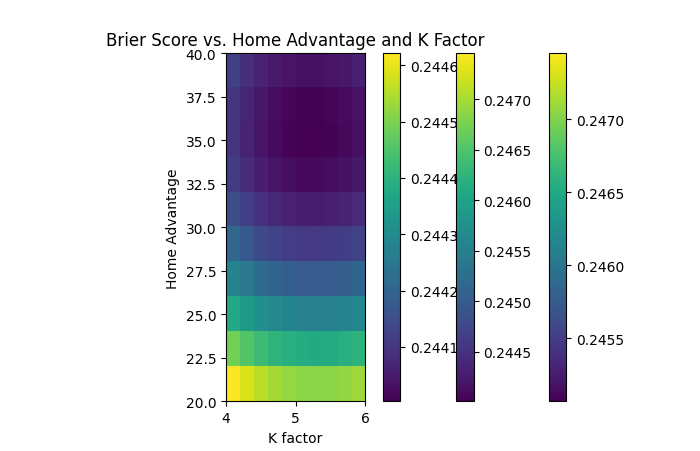

Optimal K Factor: 5.333333333333333
Optimal Home Advantage: 24.444444444444443
[[0.24412138 0.24408913 0.24406463 0.24404715 0.24403603 0.2440307
  0.24403064 0.24403537 0.24404448 0.2440576 ]
 [0.24409954 0.24406703 0.24404228 0.24402456 0.24401322 0.24400767
  0.24400739 0.24401191 0.24402082 0.24403374]
 [0.24409719 0.24406439 0.24403937 0.24402138 0.24400978 0.24400398
  0.24400346 0.24400775 0.24401644 0.24402914]
 [0.24411427 0.24408116 0.24405584 0.24403755 0.24402567 0.24401959
  0.2440188  0.24402284 0.24403128 0.24404374]
 [0.24415074 0.24411728 0.24409162 0.24407302 0.24406082 0.24405444
  0.24405336 0.24405712 0.24406528 0.24407749]
 [0.24420652 0.24417269 0.24414666 0.24412771 0.24411517 0.24410847
  0.24410707 0.24411052 0.2441184  0.24413031]
 [0.24428156 0.24424731 0.24422089 0.24420156 0.24418865 0.2441816
  0.24417986 0.24418298 0.24419054 0.24420215]
 [0.24437576 0.24434107 0.24431423 0.24429449 0.24428119 0.24427376
  0.24427166 0.24427442 0.24428164 0.24429292]
 [0

In [10]:
data_stop_date = "2024/03/01"
home_advantage = np.linspace(20,40,10)
k_factor = np.linspace(4,6, 10)
# home_advantage = [10, 50]
# k_factor = [1, 10]
all_games_path = "/home/projects/baseball-MCS/data/intermediate/all_games.json"
intensity_scores = np.zeros((len(home_advantage), len(k_factor)))
for i, home in enumerate(home_advantage):
    for j, k in enumerate(k_factor): 
        metrics = Metrics()
        simulator = EloSimulator(k_factor=k, home_advantage=home)
        schedule = Schedule(all_games_path, data_stop_date, simulator, metrics=metrics)
        schedule.prep()
        score = metrics.get_brier()
        # Accumulate the Brier Score and find the optimal one
        intensity_scores[i,j] = score[0]

# Find the optimal K Factor
heatmap = plt.imshow(intensity_scores, cmap='viridis',aspect=.25, extent=[min(k_factor), max(k_factor), min(home_advantage), max(home_advantage)])
plt.colorbar(heatmap)
plt.title("Brier Score vs. Home Advantage and K Factor")
plt.xlabel("K factor")
plt.ylabel("Home Advantage")
plt.grid(False)
plt.savefig("brier_score_heatmap.png")
plt.show()

# get min intensity score and find corresponding k and home advantage
min_score = np.min(intensity_scores)
min_score_idx = np.where(intensity_scores == min_score)
min_k = k_factor[min_score_idx[1][0]]
min_home = home_advantage[min_score_idx[0][0]]
print(f"Optimal K Factor: {min_k}")
print(f"Optimal Home Advantage: {min_home}")
print(intensity_scores)

Optimal K factor: 5.3, Optimal Home Advantage: 24.45